In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/BASES DE DADOS/BD_ML-e-DS-com-Python-de-A-a-Z/csv_result-ebay_confianca_completo.csv')

In [5]:
df.shape

(5806, 75)

In [6]:
df.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [7]:
df['blacklist'] = df['blacklist'] == 'S'

In [10]:
df.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,False,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,False,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,False,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,False,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,False,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


/Users/fernandovieira/opt/anaconda3/envs/estat_ML/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reputation', ylabel='count'>

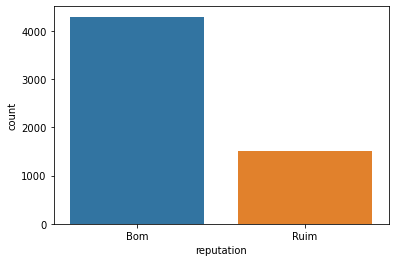

In [8]:
sns.countplot(df['reputation'])

In [9]:
len(df.columns)

75

In [11]:
x = df.iloc[:, 0:74].values

In [12]:
x.shape

(5806, 74)

In [13]:
x

array([[0, 49, False, ..., 0.6400725899947721, 0.598037041554872,
        0.828716381071851],
       [0, 56, False, ..., 0.6444645861342442, 0.603041772443901,
        0.8093789692710098],
       [0, 50, False, ..., 0.6554697130298307, 0.6450420335022421,
        0.82603890125472],
       ...,
       [78, 0, False, ..., 0.6974661634054785, 0.6739035045452172,
        0.8320726536961992],
       [95, 0, False, ..., 0.7706773179699052, 0.7100477615788761,
        0.8199238314070743],
       [53, 0, False, ..., 0.6239306346573744, 0.6331205213003834,
        0.7920921058167003]], dtype=object)

In [14]:
y = df.iloc[:, 74].values

In [15]:
y.shape

(5806,)

In [16]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

Treinamento e teste

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.2, stratify=y)

In [19]:
x_treinamento.shape, y_treinamento.shape

((4644, 74), (4644,))

In [20]:
x_teste.shape, y_teste.shape

((1162, 74), (1162,))

Classificacao com Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
modelo = RandomForestClassifier()

In [23]:
modelo.fit(x_treinamento, y_treinamento)

RandomForestClassifier()

In [24]:
previsoes = modelo.predict(x_teste)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(previsoes, y_teste)

0.7435456110154905

Sobreamostragem

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(sampling_strategy=1)

In [29]:
x_over, y_over = smote.fit_resample(x, y)

In [30]:
x_over.shape, y_over.shape

((8598, 74), (8598,))

In [31]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

In [32]:
x_treinamento_o, x_teste_o, y_treinamento_o, y_teste_o = train_test_split(x_over, y_over, test_size=0.2, stratify=y_over)

In [34]:
modelo_o = RandomForestClassifier()

In [35]:
modelo.fit(x_treinamento_o, y_treinamento_o)

RandomForestClassifier()

In [37]:
previsoes_o = modelo.predict(x_teste_o)

In [38]:
accuracy_score(previsoes_o, y_teste_o)

0.836046511627907